In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randn,randint
import itertools
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve, average_precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn import preprocessing
from tabulate import tabulate
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


# Question 1

## i

In [3]:
Xtrain=np.loadtxt('Xtrain.csv')
Ytrain=np.loadtxt('Ytrain.csv')
Xtest=np.loadtxt('Xtest.csv')

In [4]:
print('There are',len(Xtrain),'training examples in Xtrain.csv')
print('There are',len(Ytrain),'training examples in Ytrain.csv')
print('There are',len(Xtest),'testing examples in Xtest.csv')

There are 3000 training examples in Xtrain.csv
There are 3000 training examples in Ytrain.csv
There are 3000 testing examples in Xtest.csv


In [5]:
## Function that randomly plots 15 examples from given dataset. 
def rand_plot(dataset): 
    for i in range(15):
        a=randint(0,len(dataset)+1)
        obj=np.reshape(dataset[a],(28,28))
        plt.matshow(obj)
    return plt.show()

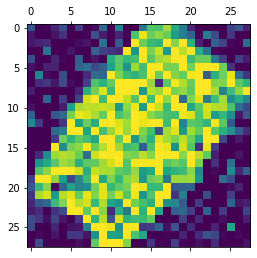

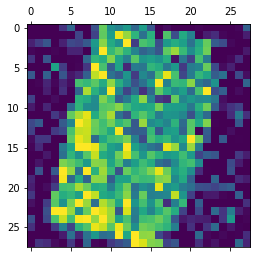

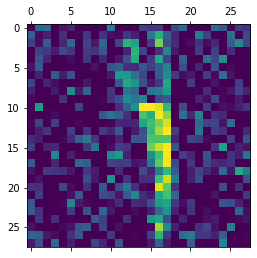

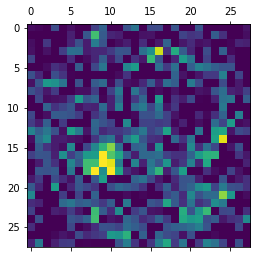

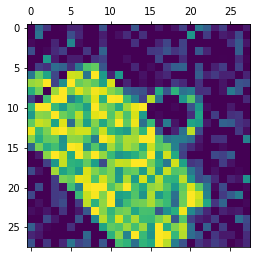

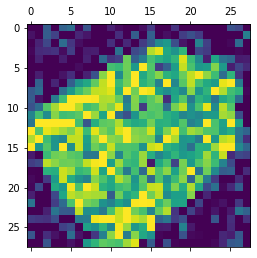

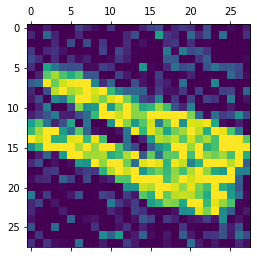

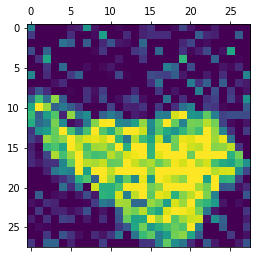

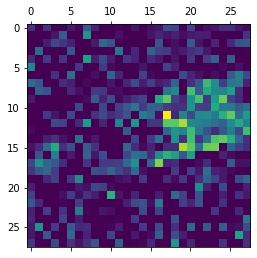

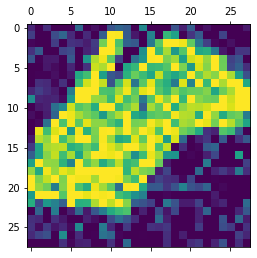

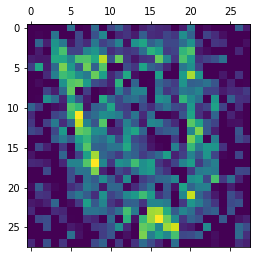

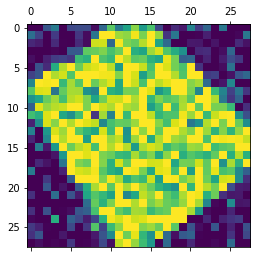

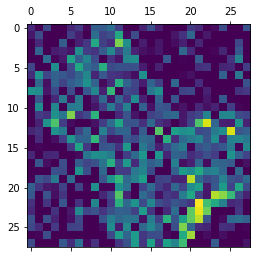

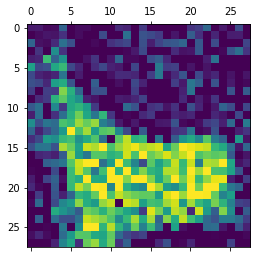

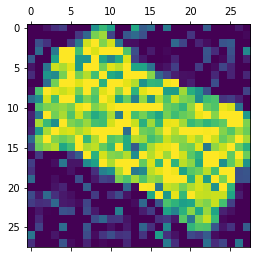

In [6]:
rand_plot(Xtest) ##change dataset name to see other files, e.g. Xtrain

## ii

In [7]:
## Function finding the number of positives and negatives. 
def find_pos_neg(dataset): 
    pos_count=0
    neg_count=0
    for item in dataset:
        if item<0:
            neg_count=neg_count+1
        if item>0:
            pos_count=pos_count+1
    print ('there are',neg_count,'negative examples')
    print ('there are',pos_count,'positive examples')
    return neg_count,pos_count

In [8]:
find_pos_neg(Ytrain) ##finding positive and negative examples in the training set

there are 882 negative examples
there are 2118 positive examples


(882, 2118)

## iii 

It is clear that this dataset is heavily imbalanced, so accuracy and AUC-ROC are not the optimal performance metrices to use. The ideal performance metric to use would be AUC-PR. 

## iv 

In [9]:
## Evaluating the performance of a random classifier using accuracy. 
def random_classifier_performance(Xtrain,Ytrain): 
    dummy_clf = DummyClassifier(strategy="uniform")
    dummy_clf.fit(Xtrain,Ytrain)
    Ytest=dummy_clf.predict(Xtrain)
    return np.mean(Ytest==Ytrain)

In [10]:
random_classifier_performance(Xtrain,Ytrain)

0.497

The expected accuracy of a random classifier is 0.5 as shown above. Each label in Y has an equal probability of being assigned to the objects in X. 

## v

In [8]:
## Random classifier  
def random_classifier(Xtrain,Ytrain):
    dummy_clf = DummyClassifier(strategy="uniform")
    dummy_clf.fit(Xtrain,Ytrain)
    Ytest=dummy_clf.predict(Xtrain)
    return Ytest

In [5]:
def plotROC(y,z,pstr = ''):
    fpr,tpr,tt = roc_curve(y, z)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(tt,fpr,'o-',tt,tpr,'x-');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['FPR','TPR']);plt.grid();plt.title(pstr)
    plt.figure()
    plt.plot(fpr,tpr,'o-');plt.xlabel('FPR');plt.ylabel('TPR');plt.grid();plt.title('ROC '+pstr+' AUC: '+str(roc_auc))
    return roc_auc

def plotPRC(y,z,pstr = ''):
    P,R,tt = precision_recall_curve(y, z)
    pr_auc = average_precision_score(y, z)
    plt.figure()
    plt.plot(tt,R[:-1],'o-',tt,P[:-1],'x-');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['Recall','Precision']);plt.grid();plt.title(pstr)
    plt.figure()
    plt.plot(R,P,'o-');plt.xlabel('Recall');plt.ylabel('Precision');plt.grid();plt.title('PRC '+pstr+' AUC: '+str(pr_auc))
    return pr_auc

0.4966468173671735

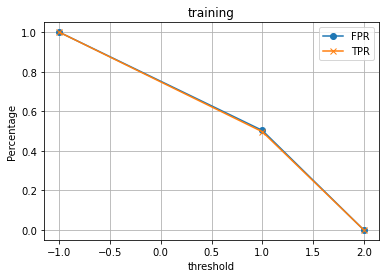

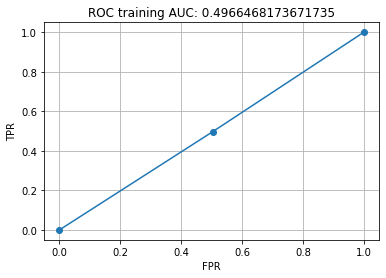

In [9]:
plotROC(Ytrain,random_classifier(Xtrain,Ytrain),'training')

0.7053538482360879

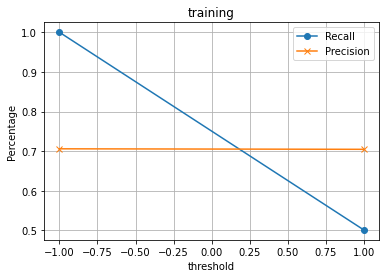

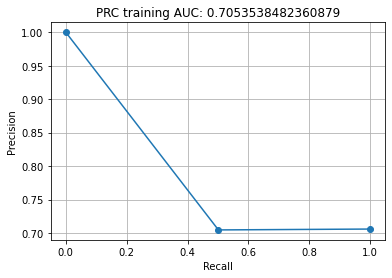

In [14]:
plotPRC(Ytrain,random_classifier(Xtrain,Ytrain),'training')

# Question 2


## i

In [10]:
def PR(y,z):
    P,R,tt = precision_recall_curve(y, z)
    pr_auc = average_precision_score(y, z)
    return pr_auc

def ROC(y,z):
    fpr,tpr,tt = roc_curve(y, z)
    roc_auc = auc(fpr, tpr)
    return roc_auc

In [11]:
## Evaluating performance of each fold,need to specify classifier used and its parameters. 
## Default dataset is given from coursework specification, can be changed to others. 
## Number of folds by default is 5. 
## If require plot of the curves, change plot=True
def detailed_performance(classifier,X=Xtrain,Y=Ytrain,n=5,plot=False):
    cv = StratifiedKFold(n_splits=n)
    classifier = classifier
    if plot: 
        for i, (train, test) in enumerate(cv.split(X, Y)):
            classifier.fit(X[train], Y[train])
            Ytest=classifier.predict(X[test])
            print('Accuracy of','fold',i+1,':',np.mean(Ytest==Y[test]))
            print('ROC of','fold',i+1,':',ROC(Y[test],Ytest))
            print('PR of','fold',i+1,':',PR(Y[test],Ytest))
            plotROC(Y[test],Ytest,'Fold'+str(i+1))
            plotPRC(Y[test],Ytest)
    else:
        for i, (train, test) in enumerate(cv.split(X, Y)):
            classifier.fit(X[train], Y[train])
            Ytest=classifier.predict(X[test])
            print('Accuracy of','fold',i+1,':',np.mean(Ytest==Y[test]))        
            print('ROC of','fold',i+1,':',ROC(Y[test],Ytest))
            print('PR of','fold',i+1,':',PR(Y[test],Ytest))
    return classifier

Accuracy of fold 1 : 0.74
ROC of fold 1 : 0.708029588336192
PR of fold 1 : 0.80877887867008
Accuracy of fold 2 : 0.76
ROC of fold 2 : 0.7321505145797599
PR of fold 2 : 0.8226719288265225
Accuracy of fold 3 : 0.74
ROC of fold 3 : 0.7130145797598627
PR of fold 3 : 0.8118697856501091
Accuracy of fold 4 : 0.7383333333333333
ROC of fold 4 : 0.712565612854109
PR of fold 4 : 0.8104761471782749
Accuracy of fold 5 : 0.755
ROC of fold 5 : 0.7293144208037826
PR of fold 5 : 0.8200355209945879


KNeighborsClassifier(n_neighbors=1)

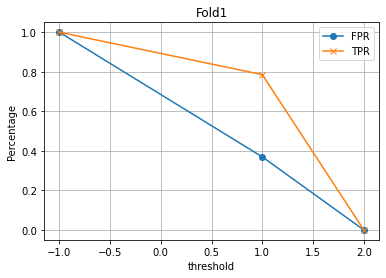

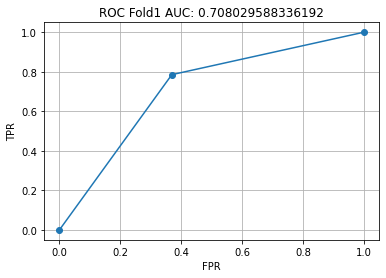

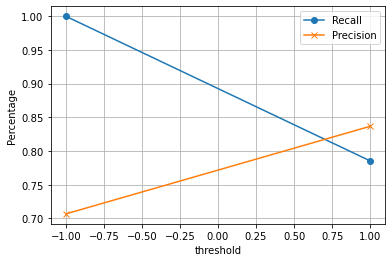

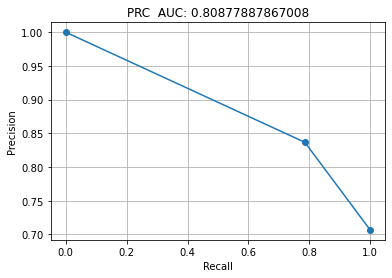

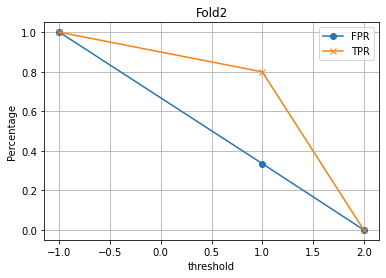

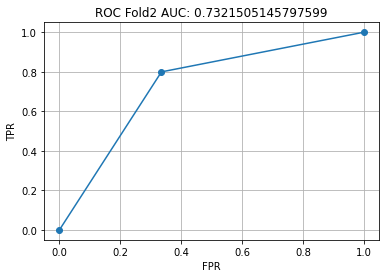

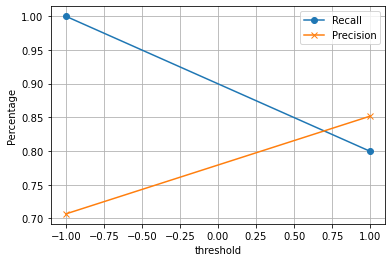

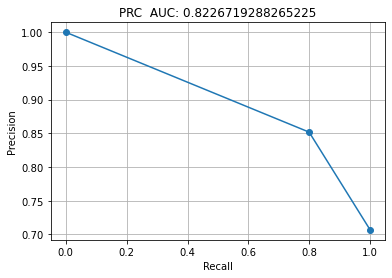

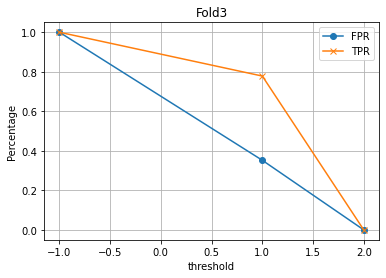

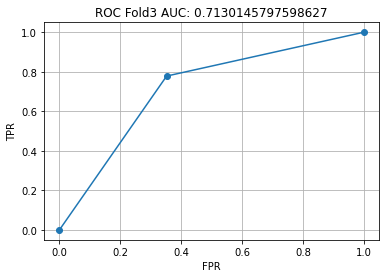

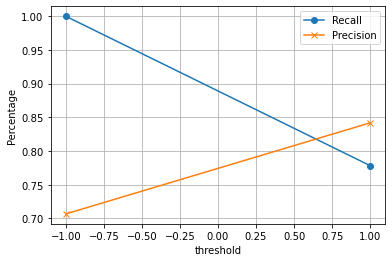

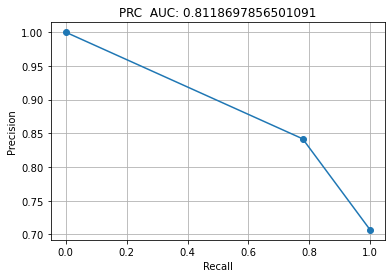

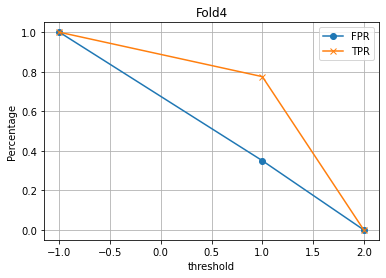

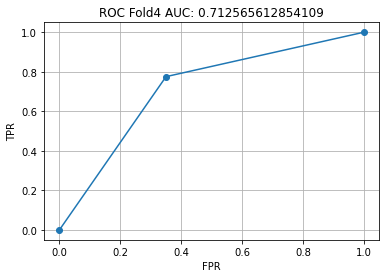

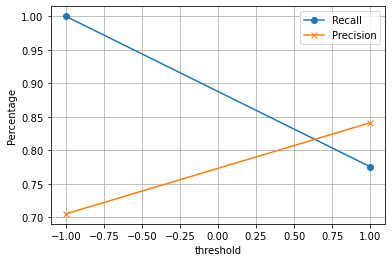

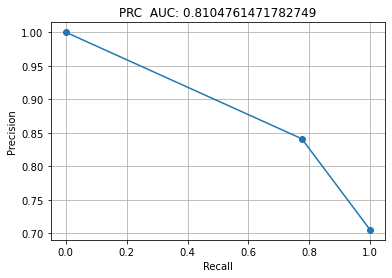

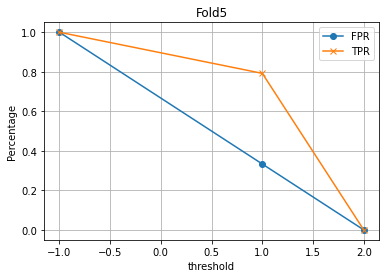

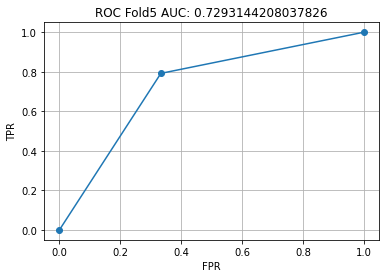

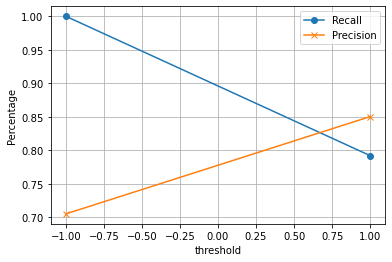

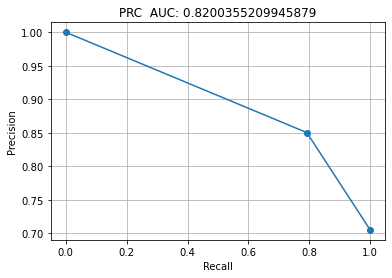

In [17]:
detailed_performance(KNeighborsClassifier(n_neighbors=1),plot=True)

## ii

In [12]:
## Evaluating overall performance, need to specify classifier used and its parameters. 
## Default dataset is given from coursework specification, can be changed to others. 
## Number of folds by default is 5. 
def performance (classifier,X=Xtrain,Y=Ytrain,n=5,cross_validation=True,testdata=Xtest):
    if cross_validation:
        As=[]
        PRs=[]
        ROCs=[]
        cv = StratifiedKFold(n_splits=n)
        classifier=classifier
        for i, (train, test) in enumerate(cv.split(X, Y)):
            classifier.fit(X[train], Y[train])
            Ytest=classifier.predict(X[test])
            A_i=np.mean(Ytest==Y[test])
            ROC_i=ROC(Y[test],Ytest)
            PR_i=PR(Y[test],Ytest)
            As.append(A_i)
            ROCs.append(ROC_i)
            PRs.append(PR_i)
        print('mean accuracy:',np.mean(As))
        print('stdev accuracy',np.std(As))
        print('mean AUC-ROC:',np.mean(ROCs))
        print('stdev AUC-ROC',np.std(ROCs))
        print('mean AUC-PR:',np.mean(PRs))
        print('stdev AUC-PR',np.std(PRs))
    else:
        classifier.fit(X,Y)
        Y=classifier.predict(testdata)
        classifier.score(testdata,Y)
    return classifier

In [19]:
performance(classifier = KNeighborsClassifier(n_neighbors=1))

mean accuracy: 0.7466666666666667
stdev accuracy 0.009006170724070879
mean AUC-ROC: 0.7190149432667412
stdev AUC-ROC 0.009766255364176621
mean AUC-PR: 0.8147664522639149
stdev AUC-PR 0.005530064696031833


KNeighborsClassifier(n_neighbors=1)

## iii

### Standardization
Not siginificant impact on the overall performance of the classifier

In [13]:
## Function to standardize dataset. 
def standardize (X=Xtrain):
    scaler = preprocessing.StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    return X_scaled

In [21]:
X_scaled=standardize()

In [22]:
detailed_performance(KNeighborsClassifier(n_neighbors=1),X_scaled)

Accuracy of fold 1 : 0.7316666666666667
ROC of fold 1 : 0.6971483704974272
PR of fold 1 : 0.8026155010166927
Accuracy of fold 2 : 0.76
ROC of fold 2 : 0.7288271869639793
PR of fold 2 : 0.8205413967896367
Accuracy of fold 3 : 0.76
ROC of fold 3 : 0.7271655231560892
PR of fold 3 : 0.8194847126222057
Accuracy of fold 4 : 0.74
ROC of fold 4 : 0.7038906919902232
PR of fold 4 : 0.8049975068780834
Accuracy of fold 5 : 0.7333333333333333
ROC of fold 5 : 0.6991625596025163
PR of fold 5 : 0.802479840262595


KNeighborsClassifier(n_neighbors=1)

In [23]:
performance(KNeighborsClassifier(n_neighbors=1),X_scaled)

mean accuracy: 0.7450000000000001
stdev accuracy 0.012560962454277859
mean AUC-ROC: 0.711238866442047
stdev AUC-ROC 0.013866379076683642
mean AUC-PR: 0.8100237915138425
stdev AUC-PR 0.008212022342481943


KNeighborsClassifier(n_neighbors=1)

### Normalization
Not siginificant impact on the overall performance of the classifier. A slight imporvement in accuracy can be seen. 

In [24]:
## Function to normalize dataset. 
def normalize (X=Xtrain):
    normalizer = preprocessing.Normalizer().fit(X)
    X_norm=normalizer.transform(X)
    return X_norm

In [25]:
X_norm=normalize()

In [26]:
detailed_performance(KNeighborsClassifier(n_neighbors=1),X_norm)

Accuracy of fold 1 : 0.7416666666666667
ROC of fold 1 : 0.6792988850771869
PR of fold 1 : 0.7917848622858382
Accuracy of fold 2 : 0.7466666666666667
ROC of fold 2 : 0.6894832761578044
PR of fold 2 : 0.797407123007167
Accuracy of fold 3 : 0.7683333333333333
ROC of fold 3 : 0.7147834476843911
PR of fold 3 : 0.8113308234470078
Accuracy of fold 4 : 0.78
ROC of fold 4 : 0.7256881836759226
PR of fold 4 : 0.8161164098801663
Accuracy of fold 5 : 0.7733333333333333
ROC of fold 5 : 0.7176743999679449
PR of fold 5 : 0.8115803918371783


KNeighborsClassifier(n_neighbors=1)

In [27]:
performance(KNeighborsClassifier(n_neighbors=1),X_norm)

mean accuracy: 0.7620000000000001
stdev accuracy 0.015107025591499533
mean AUC-ROC: 0.7053856385126499
stdev AUC-ROC 0.017804098678157118
mean AUC-PR: 0.8056439220914715
stdev AUC-PR 0.009350656858263754


KNeighborsClassifier(n_neighbors=1)

### Feature Binarization
Not siginificant impact on the overall performance of the classifier. But slight degradation in all three performance metrics. 

In [28]:
## Function to binarize features at a given threshold. 
def binarize(X=Xtrain,threshold=50):
    binarizer = preprocessing.Binarizer(threshold=threshold)
    X_binarized=binarizer.transform(X)
    return X_binarized

In [29]:
X_binarized=binarize()

In [30]:
detailed_performance(KNeighborsClassifier(n_neighbors=1),X_binarized)

Accuracy of fold 1 : 0.7216666666666667
ROC of fold 1 : 0.6651479416809605
PR of fold 1 : 0.7845425754940007
Accuracy of fold 2 : 0.725
ROC of fold 2 : 0.6774764150943395
PR of fold 2 : 0.7913740539388125
Accuracy of fold 3 : 0.7233333333333334
ROC of fold 3 : 0.6696505145797599
PR of fold 3 : 0.7870002246181491
Accuracy of fold 4 : 0.7666666666666667
ROC of fold 4 : 0.6965180109788837
PR of fold 4 : 0.7993504321890413
Accuracy of fold 5 : 0.7516666666666667
ROC of fold 5 : 0.7187362263092519
PR of fold 5 : 0.8135084036084353


KNeighborsClassifier(n_neighbors=1)

In [31]:
performance(KNeighborsClassifier(n_neighbors=1),X_binarized)

mean accuracy: 0.7376666666666667
stdev accuracy 0.018214768123085683
mean AUC-ROC: 0.6855058217286392
stdev AUC-ROC 0.019777934757675395
mean AUC-PR: 0.7951551379696878
stdev AUC-PR 0.010467746115696322


KNeighborsClassifier(n_neighbors=1)

## iv

In [122]:
## Iterate 100 times with different numbers of nearest neighbours
for i in range(100):
    print('There are',i+1,'nearest neighbour chosen. ')
    performance(KNeighborsClassifier(weights='distance',n_neighbors=i+1))

There are 1 nearest neighbour chosen. 
mean accuracy: 0.7466666666666667
stdev accuracy 0.009006170724070879
mean AUC-ROC: 0.7190149432667412
stdev AUC-ROC 0.009766255364176621
mean AUC-PR: 0.8147664522639149
stdev AUC-PR 0.005530064696031833
There are 2 nearest neighbour chosen. 
mean accuracy: 0.7466666666666667
stdev accuracy 0.009006170724070879
mean AUC-ROC: 0.7190149432667412
stdev AUC-ROC 0.009766255364176621
mean AUC-PR: 0.8147664522639149
stdev AUC-PR 0.005530064696031833
There are 3 nearest neighbour chosen. 
mean accuracy: 0.764
stdev accuracy 0.006018490028422591
mean AUC-ROC: 0.7196952952904038
stdev AUC-ROC 0.007793237463996829
mean AUC-PR: 0.8141402473534398
stdev AUC-PR 0.004223089517238946
There are 4 nearest neighbour chosen. 
mean accuracy: 0.7683333333333333
stdev accuracy 0.006497862896539283
mean AUC-ROC: 0.7287406702306699
stdev AUC-ROC 0.005693092463375974
mean AUC-PR: 0.8194926141018847
stdev AUC-PR 0.0034355154457105658
There are 5 nearest neighbour chosen. 
m

In [123]:
## k=4
performance(KNeighborsClassifier(weights='distance',n_neighbors=4))

mean accuracy: 0.7683333333333333
stdev accuracy 0.006497862896539283
mean AUC-ROC: 0.7287406702306699
stdev AUC-ROC 0.005693092463375974
mean AUC-PR: 0.8194926141018847
stdev AUC-PR 0.0034355154457105658


KNeighborsClassifier(n_neighbors=4, weights='distance')

In [34]:
detailed_performance(KNeighborsClassifier(weights='distance',n_neighbors=4))

Accuracy of fold 1 : 0.74
ROC of fold 1 : 0.708029588336192
PR of fold 1 : 0.80877887867008
Accuracy of fold 2 : 0.76
ROC of fold 2 : 0.7321505145797599
PR of fold 2 : 0.8226719288265225
Accuracy of fold 3 : 0.74
ROC of fold 3 : 0.7130145797598627
PR of fold 3 : 0.8118697856501091
Accuracy of fold 4 : 0.7383333333333333
ROC of fold 4 : 0.712565612854109
PR of fold 4 : 0.8104761471782749
Accuracy of fold 5 : 0.755
ROC of fold 5 : 0.7293144208037826
PR of fold 5 : 0.8200355209945879


KNeighborsClassifier(n_neighbors=1)

Iterating the overall performance evaluation 100 times with different numbers of nearest neighbours, the highest AUC-PR rate of all is when k=4. The average accuracy is 0.768, average AUC-ROC is 0.729 and average AUC-PR is 0.819. 

# Question 3

## k-Nearest Neighbour
Done in previous question, so no duplicate operations here. The evaluation results of performance will be used directly. 

## Perceptron

In [35]:
## Iterating over different alphas. 
## Penalty is l2. 
for i in range (6):
    a=0+i*0.25
    print('Alpha is',a)
    detailed_performance(Perceptron(alpha=a,penalty='l2'))

Alpha is 0.0
-- Epoch 1
Norm: 37219.45, NNZs: 783, Bias: 1.000000, T: 2400, Avg. loss: 1885094.733750
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 52781.44, NNZs: 784, Bias: 2.000000, T: 4800, Avg. loss: 1631190.965833
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 65556.47, NNZs: 784, Bias: 2.000000, T: 7200, Avg. loss: 1625302.356250
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 73659.46, NNZs: 784, Bias: 1.000000, T: 9600, Avg. loss: 1500485.570833
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 82750.58, NNZs: 784, Bias: -8.000000, T: 12000, Avg. loss: 1527059.938333
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 90208.26, NNZs: 784, Bias: 3.000000, T: 14400, Avg. loss: 1452121.510833
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 95703.42, NNZs: 784, Bias: 7.000000, T: 16800, Avg. loss: 1410541.884167
Total training time: 0.07 seconds.
-- Epoch 8
Norm: 101382.66, NNZs: 784, Bias: 0.000000, T: 19200, Avg. loss: 1408535.314167
Total training time: 0.0

In [36]:
## Iterating over different alphas. 
## Penalty is l1. 
for i in range (6):
    a=0+i*0.25
    print('Alpha is',a)
    detailed_performance(Perceptron(alpha=a,penalty='l1'))

Alpha is 0.0
-- Epoch 1
Norm: 37219.45, NNZs: 783, Bias: 1.000000, T: 2400, Avg. loss: 1885094.733750
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 52781.44, NNZs: 784, Bias: 2.000000, T: 4800, Avg. loss: 1631190.965833
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 65556.47, NNZs: 784, Bias: 2.000000, T: 7200, Avg. loss: 1625302.356250
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 73659.46, NNZs: 784, Bias: 1.000000, T: 9600, Avg. loss: 1500485.570833
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 82750.58, NNZs: 784, Bias: -8.000000, T: 12000, Avg. loss: 1527059.938333
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 90208.26, NNZs: 784, Bias: 3.000000, T: 14400, Avg. loss: 1452121.510833
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 95703.42, NNZs: 784, Bias: 7.000000, T: 16800, Avg. loss: 1410541.884167
Total training time: 0.14 seconds.
-- Epoch 8
Norm: 101382.66, NNZs: 784, Bias: 0.000000, T: 19200, Avg. loss: 1408535.314167
Total training time: 0.1

In [37]:
## Iterating over different alphas. 
## Penalty is elasticnet. 
for i in range (6):
    a=0+i*0.25
    print('Alpha is',a)
    detailed_performance(Perceptron(alpha=a,penalty='elasticnet'))

Alpha is 0.0
-- Epoch 1
Norm: 37219.45, NNZs: 783, Bias: 1.000000, T: 2400, Avg. loss: 1885094.733750
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 52781.44, NNZs: 784, Bias: 2.000000, T: 4800, Avg. loss: 1631190.965833
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 65556.47, NNZs: 784, Bias: 2.000000, T: 7200, Avg. loss: 1625302.356250
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 73659.46, NNZs: 784, Bias: 1.000000, T: 9600, Avg. loss: 1500485.570833
Total training time: 0.08 seconds.
-- Epoch 5
Norm: 82750.58, NNZs: 784, Bias: -8.000000, T: 12000, Avg. loss: 1527059.938333
Total training time: 0.09 seconds.
-- Epoch 6
Norm: 90208.26, NNZs: 784, Bias: 3.000000, T: 14400, Avg. loss: 1452121.510833
Total training time: 0.11 seconds.
-- Epoch 7
Norm: 95703.42, NNZs: 784, Bias: 7.000000, T: 16800, Avg. loss: 1410541.884167
Total training time: 0.14 seconds.
-- Epoch 8
Norm: 101382.66, NNZs: 784, Bias: 0.000000, T: 19200, Avg. loss: 1408535.314167
Total training time: 0.1

In [61]:
## Iterating over different alphas. 
## Penalty is l2.
for i in range (6):
    a=0+i*0.25
    print('Alpha is',a)
    performance(Perceptron(alpha=a,penalty='l2'))

Alpha is 0.0
mean accuracy: 0.6373333333333333
stdev accuracy 0.07758579480520615
mean AUC-ROC: 0.5114335301658819
stdev AUC-ROC 0.013343514682282967
mean AUC-PR: 0.7108566271941327
stdev AUC-PR 0.00631414076030003
Alpha is 0.25
mean accuracy: 0.517
stdev accuracy 0.18752599819758325
mean AUC-ROC: 0.5008683533447684
stdev AUC-ROC 0.0017367066895368488
mean AUC-PR: 0.7063613006824568
stdev AUC-PR 0.0012924989913023453
Alpha is 0.5
mean accuracy: 0.5406666666666667
stdev accuracy 0.20194773801379623
mean AUC-ROC: 0.5
stdev AUC-ROC 0.0
mean AUC-PR: 0.7060000000000001
stdev AUC-PR 0.0008164965809277448
Alpha is 0.75
mean accuracy: 0.5406666666666667
stdev accuracy 0.20194773801379623
mean AUC-ROC: 0.5
stdev AUC-ROC 0.0
mean AUC-PR: 0.7060000000000001
stdev AUC-PR 0.0008164965809277448
Alpha is 1.0
mean accuracy: 0.5406666666666667
stdev accuracy 0.20194773801379623
mean AUC-ROC: 0.5
stdev AUC-ROC 0.0
mean AUC-PR: 0.7060000000000001
stdev AUC-PR 0.0008164965809277448
Alpha is 1.25
mean accu

In [62]:
## Iterating over different alphas. 
## Penalty is l1. 
for i in range (6):
    a=0+i*0.25
    print('Alpha is',a)
    performance(Perceptron(alpha=a,penalty='l1'))

Alpha is 0.0
mean accuracy: 0.6373333333333333
stdev accuracy 0.07758579480520615
mean AUC-ROC: 0.5114335301658819
stdev AUC-ROC 0.013343514682282967
mean AUC-PR: 0.7108566271941327
stdev AUC-PR 0.00631414076030003
Alpha is 0.25
mean accuracy: 0.6823333333333335
stdev accuracy 0.024576411454889004
mean AUC-ROC: 0.5001198364789496
stdev AUC-ROC 0.007686210153910641
mean AUC-PR: 0.7060671295223668
stdev AUC-PR 0.003065992801574789
Alpha is 0.5
mean accuracy: 0.673
stdev accuracy 0.01950498511777037
mean AUC-ROC: 0.5208584348269418
stdev AUC-ROC 0.016036317625575308
mean AUC-PR: 0.714874012211016
stdev AUC-PR 0.006465335665142628
Alpha is 0.75
mean accuracy: 0.6559999999999999
stdev accuracy 0.04192055979269995
mean AUC-ROC: 0.5186797195979829
stdev AUC-ROC 0.01580916681287366
mean AUC-PR: 0.7139463886108711
stdev AUC-PR 0.006580545340712769
Alpha is 1.0
mean accuracy: 0.5973333333333333
stdev accuracy 0.05590269323665103
mean AUC-ROC: 0.5123556921850695
stdev AUC-ROC 0.023714081353409525

In [63]:
## Iterating over different alphas. 
## Penalty is elasticnet. 
for i in range (6):
    a=0+i*0.25
    print('Alpha is',a)
    performance(Perceptron(alpha=a,penalty='elasticnet'))

Alpha is 0.0
mean accuracy: 0.6373333333333333
stdev accuracy 0.07758579480520615
mean AUC-ROC: 0.5114335301658819
stdev AUC-ROC 0.013343514682282967
mean AUC-PR: 0.7108566271941327
stdev AUC-PR 0.00631414076030003
Alpha is 0.25
mean accuracy: 0.5423333333333333
stdev accuracy 0.20196424325992846
mean AUC-ROC: 0.501897512864494
stdev AUC-ROC 0.004152219017807968
mean AUC-PR: 0.7067917782663274
stdev AUC-PR 0.0021727082578241208
Alpha is 0.5
mean accuracy: 0.7030000000000001
stdev accuracy 0.0057154760664940825
mean AUC-ROC: 0.4982096912521441
stdev AUC-ROC 0.0035806174957118348
mean AUC-PR: 0.7052617484063171
stdev AUC-PR 0.0013646951567014127
Alpha is 0.75
mean accuracy: 0.7056666666666667
stdev accuracy 0.0013333333333333253
mean AUC-ROC: 0.4997635933806146
stdev AUC-ROC 0.00047281323877068626
mean AUC-PR: 0.7059017353587738
stdev AUC-PR 0.0009496418840703375
Alpha is 1.0
mean accuracy: 0.7050000000000001
stdev accuracy 0.0025819888974716277
mean AUC-ROC: 0.49929078014184397
stdev AU

Below is the table of AUC-PR under different values of alpha and types of penalty in Perceptron

In [66]:
perceptron_table={'Penalty Type':['l2','l1','Elasticnet'],'Alpha = 0':[0.711,0.711,0.711],
                  'Alpha = 0.25':[0.706,0.706,0.707],'Alpha = 0.5':[0.706,0.715,0.705],
                  'Alpha = 0.75':[0.706,0.713,0.706],'Alpha = 1':[0.706,0.711,0.706],
                  'Alpha = 1.25':[0.706,0.708,0.706]}
print(tabulate(perceptron_table,headers='keys'))

Penalty Type      Alpha = 0    Alpha = 0.25    Alpha = 0.5    Alpha = 0.75    Alpha = 1    Alpha = 1.25
--------------  -----------  --------------  -------------  --------------  -----------  --------------
l2                    0.711           0.706          0.706           0.706        0.706           0.706
l1                    0.711           0.706          0.715           0.713        0.711           0.708
Elasticnet            0.711           0.707          0.705           0.706        0.706           0.706


Obviously Perceptron performs the best when alpha is 0.5 using l1 penalty. Below is the detailed performance analysis of each fold. 

In [67]:
detailed_performance(Perceptron(alpha=0.5,penalty='l1'))

Accuracy of fold 1 : 0.6733333333333333
ROC of fold 1 : 0.5146333619210978
PR of fold 1 : 0.7127918521659247
Accuracy of fold 2 : 0.68
ROC of fold 2 : 0.5326436535162951
PR of fold 2 : 0.7204979035639413
Accuracy of fold 3 : 0.695
ROC of fold 3 : 0.49506861063464835
PR of fold 3 : 0.7046282474292853
Accuracy of fold 4 : 0.68
ROC of fold 4 : 0.5200544937292142
PR of fold 4 : 0.7134515366430261
Accuracy of fold 5 : 0.6366666666666667
ROC of fold 5 : 0.5418920543334536
PR of fold 5 : 0.7230005212529025


Perceptron(alpha=0.5, penalty='l1')

## Naïve Bayes Classifier

In [42]:
performance(GaussianNB())

mean accuracy: 0.5523333333333333
stdev accuracy 0.03694741007311758
mean AUC-ROC: 0.5439980656093832
stdev AUC-ROC 0.03446301509168365
mean AUC-PR: 0.7256137144218915
stdev AUC-PR 0.016509371553244067


GaussianNB()

In [41]:
detailed_performance(GaussianNB())

Accuracy of fold 1 : 0.5666666666666667
ROC of fold 1 : 0.5604631217838765
PR of fold 1 : 0.7333799208013044
Accuracy of fold 2 : 0.615
ROC of fold 2 : 0.6046312178387651
PR of fold 2 : 0.7547295228609896
Accuracy of fold 3 : 0.54
ROC of fold 3 : 0.5166702401372213
PR of fold 3 : 0.713697759666555
Accuracy of fold 4 : 0.505
ROC of fold 4 : 0.5207957687222022
PR of fold 4 : 0.7138758110759016
Accuracy of fold 5 : 0.535
ROC of fold 5 : 0.5174299795648516
PR of fold 5 : 0.7123855577047066


GaussianNB()

## Logistic Regression

In [72]:
performance(LogisticRegression(max_iter=500))

mean accuracy: 0.6126666666666666
stdev accuracy 0.011575836902790234
mean AUC-ROC: 0.5348015232855744
stdev AUC-ROC 0.006310824626146602
mean AUC-PR: 0.7208798865565141
stdev AUC-PR 0.00340060717364855


LogisticRegression(max_iter=500)

Not significant improvement made when max_iter increases. Below is the detailed analysis of each fold. 

In [73]:
detailed_performance(LogisticRegression(max_iter=1000))

Accuracy of fold 1 : 0.6
ROC of fold 1 : 0.5408447684391081
PR of fold 1 : 0.7242147894034687
Accuracy of fold 2 : 0.63
ROC of fold 2 : 0.5421312178387651
PR of fold 2 : 0.7247247350736623
Accuracy of fold 3 : 0.6216666666666667
ROC of fold 3 : 0.5329116638078903
PR of fold 3 : 0.7206728264467568
Accuracy of fold 4 : 0.61
ROC of fold 4 : 0.5246223504427615
PR of fold 4 : 0.7154487886217659
Accuracy of fold 5 : 0.6016666666666667
ROC of fold 5 : 0.5334976158993469
PR of fold 5 : 0.7193382932369166


LogisticRegression(max_iter=1000)

## Linear SVM

In [45]:
## Iterate over different values of C. 
for i in range(10):
    c=(i+1)*0.1
    print('C value is',c)
    detailed_performance(LinearSVC(C=c))

C value is 0.1
[LibLinear]..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

KeyboardInterrupt: 

In [79]:
## Iterate over different values of C. 
for i in range(10):
    c=(i+1)*0.25
    print('C value is',c)
    performance(LinearSVC(C=c,max_iter=5000))

C value is 0.25


/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


mean accuracy: 0.5346666666666667
stdev accuracy 0.06840565278786054
mean AUC-ROC: 0.5255482955554911
stdev AUC-ROC 0.022989555243470794
mean AUC-PR: 0.7177662144164905
stdev AUC-PR 0.011175731624439104
C value is 0.5


/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


mean accuracy: 0.5946666666666667
stdev accuracy 0.05740112271453313
mean AUC-ROC: 0.516778913332991
stdev AUC-ROC 0.013445793303848846
mean AUC-PR: 0.7131863314041407
stdev AUC-PR 0.005835857784325168
C value is 0.75


/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


mean accuracy: 0.585
stdev accuracy 0.06229856427808841
mean AUC-ROC: 0.5238414614302982
stdev AUC-ROC 0.015543930094616026
mean AUC-PR: 0.7162775534132721
stdev AUC-PR 0.007254049177164577
C value is 1.0


/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


mean accuracy: 0.5653333333333334
stdev accuracy 0.0448131925020102
mean AUC-ROC: 0.5139223014184742
stdev AUC-ROC 0.015953586383734196
mean AUC-PR: 0.7119470778760466
stdev AUC-PR 0.006187297793354881
C value is 1.25


/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


mean accuracy: 0.601
stdev accuracy 0.0431740662898458
mean AUC-ROC: 0.5154784024405339
stdev AUC-ROC 0.02188572852923962
mean AUC-PR: 0.7127711967383158
stdev AUC-PR 0.00933848417913232
C value is 1.5


/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


mean accuracy: 0.5746666666666667
stdev accuracy 0.10902293336725076
mean AUC-ROC: 0.5182520745287384
stdev AUC-ROC 0.011576412733083227
mean AUC-PR: 0.7139409628342653
stdev AUC-PR 0.004447789933121008
C value is 1.75


/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


mean accuracy: 0.607
stdev accuracy 0.041249915824829925
mean AUC-ROC: 0.5028259382295353
stdev AUC-ROC 0.012430067167194385
mean AUC-PR: 0.7072218241951104
stdev AUC-PR 0.005855778113942384
C value is 2.0


/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


mean accuracy: 0.643
stdev accuracy 0.051933718441019724
mean AUC-ROC: 0.5092995402349332
stdev AUC-ROC 0.00981771538747504
mean AUC-PR: 0.7099162338060225
stdev AUC-PR 0.003853717089378601
C value is 2.25


/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


mean accuracy: 0.6113333333333334
stdev accuracy 0.04690889515267275
mean AUC-ROC: 0.5274906355226013
stdev AUC-ROC 0.02168125929291808
mean AUC-PR: 0.7179239441353482
stdev AUC-PR 0.00891956638634365
C value is 2.5


/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


mean accuracy: 0.5980000000000001
stdev accuracy 0.05127702539474508
mean AUC-ROC: 0.51840632311246
stdev AUC-ROC 0.01301421188323694
mean AUC-PR: 0.7138506080525364
stdev AUC-PR 0.005368506755545229


/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Below is the table of AUC-PR of Linear SVM under diffferent values of C. 

In [83]:
LinearSVM_table={'':['AUC-PR'],'C=0.25':[0.718],'C=0.5':[0.713],
                 'C=0.75':[0.716],'C=1':[0.712],'C=1.25':[0.713],
                 'C=1.5':[0.714],'C=1.75':[0.707],'C=2':[0.710],
                 'C=2.25':[0.718],'C=2.5':[0.714]}
print(tabulate(LinearSVM_table,headers='keys'))

          C=0.25    C=0.5    C=0.75    C=1    C=1.25    C=1.5    C=1.75    C=2    C=2.25    C=2.5
------  --------  -------  --------  -----  --------  -------  --------  -----  --------  -------
AUC-PR     0.718    0.713     0.716  0.712     0.713    0.714     0.707   0.71     0.718    0.714


Obviously Linear SVM performs the best when C is 2.25. Below is the detailed analysis of each fold. 

In [84]:
detailed_performance(LinearSVC(C=2.25,max_iter=5000))

/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of fold 1 : 0.4583333333333333
ROC of fold 1 : 0.4987671526586621
PR of fold 1 : 0.7061564758996843


/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of fold 2 : 0.5233333333333333
ROC of fold 2 : 0.5381110634648371
PR of fold 2 : 0.7232026336477988


/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of fold 3 : 0.585
ROC of fold 3 : 0.483704974271012
PR of fold 3 : 0.699998580291608


/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of fold 4 : 0.5766666666666667
ROC of fold 4 : 0.5486236326481548
PR of fold 4 : 0.726211198842746
Accuracy of fold 5 : 0.645
ROC of fold 5 : 0.5067315783147013
PR of fold 5 : 0.7078132387706856


/Users/royju/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=2.25, max_iter=5000)

## Kernelized SVM

In [57]:
## Iterate over different kernels. 
## System recommends standardization prior to training, thus X-scaled used. 
kernels=['linear', 'poly', 'rbf', 'sigmoid']
for item in kernels:
    print('Kernel used is',item)
    performance(SVC(gamma='auto',kernel=item),X=X_scaled)

Kernel used is linear
mean accuracy: 0.6143333333333333
stdev accuracy 0.017720045146669326
mean AUC-ROC: 0.5386271479569216
stdev AUC-ROC 0.016698937480621075
mean AUC-PR: 0.7226518290945819
stdev AUC-PR 0.007511299641822744
Kernel used is poly
mean accuracy: 0.7343333333333334
stdev accuracy 0.004666666666666667
mean AUC-ROC: 0.5590909163933493
stdev AUC-ROC 0.0059018975062003565
mean AUC-PR: 0.7314400468916495
stdev AUC-PR 0.0022079715497827345
Kernel used is rbf
mean accuracy: 0.7423333333333334
stdev accuracy 0.00885688683705758
mean AUC-ROC: 0.5730028114050849
stdev AUC-ROC 0.017327136102345753
mean AUC-PR: 0.7377847158348392
stdev AUC-PR 0.0074248106387102535
Kernel used is sigmoid
mean accuracy: 0.666
stdev accuracy 0.005436502143433379
mean AUC-ROC: 0.48721396470883604
stdev AUC-ROC 0.0040016737805147334
mean AUC-PR: 0.7007389013485744
stdev AUC-PR 0.0019635815724267885


Below is the table of AUC-PR of Kernelized SVM using different types of kernels. 

In [77]:
KSVM_kernels={'Type of Kernel':['linear','poly','rbf','sigmond'],'AUC-PR':[0.723,0.731,0.738,0.701]}
print(tabulate(KSVM_kernels,headers='keys'))

Type of Kernel      AUC-PR
----------------  --------
linear               0.723
poly                 0.731
rbf                  0.738
sigmond              0.701


In [60]:
## Iterate over different values of C. 
for i in range(10):
    c=0+(i+1)*0.25
    print('C value is',c)
    performance(SVC(gamma='auto',C=c),X=X_scaled)

C value is 0.25
mean accuracy: 0.7060000000000001
stdev accuracy 0.0008164965809277448
mean AUC-ROC: 0.5
stdev AUC-ROC 0.0
mean AUC-PR: 0.7060000000000001
stdev AUC-PR 0.0008164965809277448
C value is 0.5
mean accuracy: 0.7063333333333334
stdev accuracy 0.001247219128924676
mean AUC-ROC: 0.5005681818181819
stdev AUC-ROC 0.0011363636363636686
mean AUC-PR: 0.7062359488035616
stdev AUC-PR 0.001097247658016969
C value is 0.75
mean accuracy: 0.7216666666666667
stdev accuracy 0.0038005847503304506
mean AUC-ROC: 0.5289317849686023
stdev AUC-ROC 0.009174169093426037
mean AUC-PR: 0.718247315447343
stdev AUC-PR 0.003214746074851559
C value is 1.0
mean accuracy: 0.7423333333333334
stdev accuracy 0.00885688683705758
mean AUC-ROC: 0.5730028114050849
stdev AUC-ROC 0.017327136102345753
mean AUC-PR: 0.7377847158348392
stdev AUC-PR 0.0074248106387102535
C value is 1.25
mean accuracy: 0.7556666666666667
stdev accuracy 0.009977753031397172
mean AUC-ROC: 0.6072613905351166
stdev AUC-ROC 0.0170770446794736

Below is the table of AUC-PR of Kernelized SVM using different values of C. 

In [78]:
KSVM_C={'Value of C':[0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5],
        'AUC-PR':[0.706,0.706,0.718,0.738,0.754,0.762,0.766,0.768,0.769,0.770]}
print(tabulate(KSVM_C,headers='keys'))

  Value of C    AUC-PR
------------  --------
        0.25     0.706
        0.5      0.706
        0.75     0.718
        1        0.738
        1.25     0.754
        1.5      0.762
        1.75     0.766
        2        0.768
        2.25     0.769
        2.5      0.77


Clearly Kernelized SVM performs the best using rbf kernel with a C value of 2.5. Below is the detailed anlysis of each fold. 

In [86]:
detailed_performance(SVC(gamma='auto',C=2.5),X=X_scaled)

Accuracy of fold 1 : 0.7316666666666667
ROC of fold 1 : 0.6273584905660378
PR of fold 1 : 0.7643673580999258
Accuracy of fold 2 : 0.7733333333333333
ROC of fold 2 : 0.6634862778730704
PR of fold 2 : 0.782245283018868
Accuracy of fold 3 : 0.7466666666666667
ROC of fold 3 : 0.6280017152658662
PR of fold 3 : 0.7644773884396526
Accuracy of fold 4 : 0.75
ROC of fold 4 : 0.6518411668069078
PR of fold 4 : 0.7752162801098971
Accuracy of fold 5 : 0.7433333333333333
ROC of fold 5 : 0.6306847778178466
PR of fold 5 : 0.7644181876126737


SVC(C=2.5, gamma='auto')

## Summary 

In [124]:
summary={'Classiffer':['k-Nearnest Neighbours','Perceptron','Naiver Bayes','Logistic Regression',
                       'Linear SVM','Kernelized SVM'],
         'Parameters':['k=1','alpha=0.5,penalty=l1','','max_iter=1000','C=2.25','kernel=rbf,C=2.25'],
        'AUC-PR':[0.819,0.715,0.726,0.721,0.718,0.77]}
print(tabulate(summary,headers='keys'))

Classiffer             Parameters              AUC-PR
---------------------  --------------------  --------
k-Nearnest Neighbours  k=1                      0.819
Perceptron             alpha=0.5,penalty=l1     0.715
Naiver Bayes                                    0.726
Logistic Regression    max_iter=1000            0.721
Linear SVM             C=2.25                   0.718
Kernelized SVM         kernel=rbf,C=2.25        0.77


# Question 4

## i

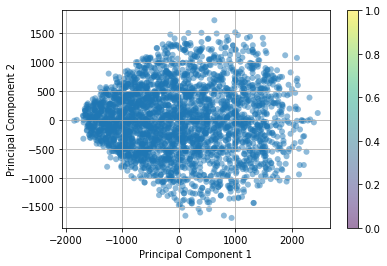

In [95]:
PCA2=PCA(n_components=2)
PCA2.fit(Xtrain)
projected_2=PCA2.transform(Xtrain)
c1=0
c2=1
plt.scatter(projected_2[:,c1],projected_2[:,c2],
            edgecolors='None',alpha=0.5,
           cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.grid()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

It can be seen that there are two classes of data, which are deep blue and blue respectively. 

## ii

The number of dimensions to explain 95% variance is 506


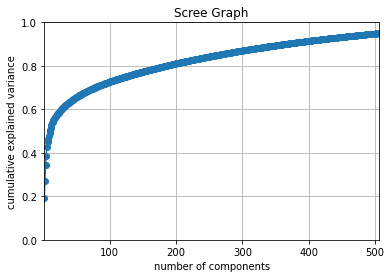

In [119]:
PCA95=PCA(n_components=0.95)
PCA95.fit(Xtrain)
projected_95=PCA95.transform(Xtrain)
print('The number of dimensions to explain 95% variance is',projected_95.shape[1])

plt.plot(np.arange(len(PCA95.explained_variance_ratio_))+1,
         np.cumsum(PCA95.explained_variance_ratio_),'o-') #plot the scree graph
plt.axis([1,len(PCA95.explained_variance_ratio_),0,1])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Scree Graph')
plt.grid()
plt.show()


The number of dimensions to explain 95% variance is 506. 

## iii

In [120]:
performance(SVC(gamma='auto',kernel='poly'),projected_95)

mean accuracy: 0.7659999999999999
stdev accuracy 0.020779263167344932
mean AUC-ROC: 0.6661989277646747
stdev AUC-ROC 0.02555541010371722
mean AUC-PR: 0.7835312352112362
stdev AUC-PR 0.012978204100079903


SVC(gamma='auto', kernel='poly')

# Question 5

In [14]:
## Building pipeline. 
pipeline=Pipeline([('sc',preprocessing.StandardScaler()), ## Standardise data
                   ('pca',PCA(n_components=506)),         ## PCA to reduce dimensions
                   ('clf',KNeighborsClassifier(n_neighbors=4,weights='distance'))])

In [17]:
## Fit the model and export prediction score. 
pipeline.fit(Xtrain,Ytrain)
Ytest_prob=pipeline.predict_proba(Xtest)
np.savetxt('u2088255.csv',Ytest_probb,fmt='%i')

## Export predicted labels
Ytest=pipeline.predict(Xtest)
np.savetxt('u2088255_results.csv',Ytest,fmt='%i')

In [136]:
performance(pipeline)

mean accuracy: 0.754
stdev accuracy 0.010252370999486489
mean AUC-ROC: 0.7106646347669965
stdev AUC-ROC 0.010134227271098731
mean AUC-PR: 0.8091315659746717
stdev AUC-PR 0.006118758746445033


Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA(n_components=506)),
                ('clf',
                 KNeighborsClassifier(n_neighbors=4, weights='distance'))])

# Overall Summary

In [16]:
overall_summary={'Classiffer':['k-Nearnest Neighbours','Perceptron','Naiver Bayes','Logistic Regression',
                       'Linear SVM','Kernelized SVM','PCA SCM','Pipeline (kNN)'],
         'Parameters':['k=1','alpha=0.5,penalty=l1','','max_iter=1000','C=2.25',
                       'kernel=rbf,C=2.25','kernel=poly','standardized data,k=4,weights=distance'],
        'AUC-PR':[0.819,0.715,0.726,0.721,0.718,0.77,0.784,0.809]}
print(tabulate(overall_summary,headers='keys'))

Classiffer             Parameters                                AUC-PR
---------------------  --------------------------------------  --------
k-Nearnest Neighbours  k=1                                        0.819
Perceptron             alpha=0.5,penalty=l1                       0.715
Naiver Bayes                                                      0.726
Logistic Regression    max_iter=1000                              0.721
Linear SVM             C=2.25                                     0.718
Kernelized SVM         kernel=rbf,C=2.25                          0.77
PCA SCM                kernel=poly                                0.784
Pipeline (kNN)         standardized data,k=4,weights=distance     0.809
